# **Feature Engineering to obtain redundant columns that can be dropped during training**

In [ ]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing datasets
met_stations = pd.read_csv('/content/drive/MyDrive/FYP/met-stations.tsv',sep='\t',index_col=0)
met_forecast = pd.read_csv('/content/drive/MyDrive/FYP/met-forecast.tsv',sep='\t',index_col=0) 
rl_sites = pd.read_csv('/content/drive/MyDrive/FYP/rl-sites.tsv',sep='\t',index_col=0)
rl_kpis = pd.read_csv('/content/drive/MyDrive/FYP/rl-kpis.tsv',sep='\t',index_col=0)
distances = pd.read_csv('/content/drive/MyDrive/FYP/distances.tsv',sep='\t', index_col=0)
met_real = pd.read_csv('/content/drive/MyDrive/FYP/met-real.tsv',nrows=3000, sep='\t',index_col=0)

In [ ]:
met_stations.head()

,station_no,height,clutter_class
0,WS_17047,381,DENSE TREE
1,WS_17062,5,LOW-MEDIUM URBAN
2,WS_17063,99,AIRPORT
3,WS_17064,18,OPEN IN URBAN
4,WS_17065,123,LOW-SPARSE URBAN


In [ ]:
rl_kpis.head()

,type,datetime,tip,mlid,mw_connection_no,site_id,card_type,adaptive_modulation,freq_band,severaly_error_second,error_second,unavail_second,avail_time,bbe,rxlevmax,capacity,modulation,rlf
0,ENK,2018-12-31,FAR,A0BE,"1,349,988",RL_;ABDV,cardtype1,Enable,f3,0.0,0.0,0.0,86.4,0.0,-31.0,456.0,1024QAM,False
1,ENK,2018-12-31,FAR,A0BI,"1,349,988",RL_;ABDV,cardtype1,Enable,f3,0.0,0.0,0.0,86.4,0.0,-30.7,456.0,1024QAM,False
2,ENK,2018-12-31,FAR,A5AB,"1,344,018",RL_;ABDV,cardtype4,Enable,f3,0.0,0.0,0.0,86.4,0.0,-34.4,406.0,512QAM,False
3,NEC,2018-12-31,FAR,A8CQ,"1,351,204",RL_;ABDV,cardtype5,Enable,f2,0.0,0.0,0.0,86.4,0.0,-35.3,247.0,2048QAM*,False
4,NEC,2018-12-31,FAR,A8DQ,"1,351,204",RL_;ABDV,cardtype5,Enable,f2,0.0,0.0,0.0,86.4,0.0,-35.3,247.0,2048QAM*,False


In [ ]:
# Separating out the columns having numerical values
data=rl_kpis[['mw_connection_no',	'severaly_error_second','error_second','unavail_second','avail_time','bbe','rxlevmax','capacity','rlf']]

In [ ]:
rl_kpis.shape

(1992986, 18)

In [ ]:
# Count of number of failure and success
f,t=rl_kpis['rlf'].value_counts()
print(f)
print(t)

1991767
1219


In [ ]:
# Percentage of radio link success
no_failure_percent=f/(f+t)*100
no_failure_percent

99.93883549608476

In [ ]:
# Percentage of radio link failure
failure_percent=t/(f+t)*100
failure_percent

0.06116450391523071

In [ ]:
rl_kpis.drop(columns=['datetime'], inplace=True)

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [ ]:
data=rl_kpis[['type','severaly_error_second','error_second','unavail_second','avail_time','bbe','rxlevmax','capacity','rlf']]

In [ ]:
data

,type,severaly_error_second,error_second,unavail_second,avail_time,bbe,rxlevmax,capacity,rlf
0,ENK,0.0,0.0,0.0,86.4,0.0,-31.0,456.0,False
1,ENK,0.0,0.0,0.0,86.4,0.0,-30.7,456.0,False
2,ENK,0.0,0.0,0.0,86.4,0.0,-34.4,406.0,False
3,NEC,0.0,0.0,0.0,86.4,0.0,-35.3,247.0,False
4,NEC,0.0,0.0,0.0,86.4,0.0,-35.3,247.0,False
...,...,...,...,...,...,...,...,...,...
1992981,NEC,0.0,0.0,0.0,86.4,0.0,-36.8,495.0,False
1992982,NEC,0.0,0.0,0.0,86.4,0.0,-36.8,495.0,False
1992983,NEC,0.0,0.0,0.0,86.4,0.0,-28.9,495.0,False
1992984,NEC,0.0,0.0,0.0,86.4,0.0,-28.9,495.0,False


In [ ]:
# Ending the categorical columns
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

In [ ]:
# Checking the correlation to check if any pair of columns have any high correlation value
corr=data.corr()
corr

,type,severaly_error_second,error_second,unavail_second,avail_time,bbe,rxlevmax,capacity,rlf
type,1.000000,0.009488,-0.006588,-0.005913,0.059478,0.003483,0.169600,0.231208,-0.004724
severaly_error_second,0.009488,1.000000,0.175379,0.052222,0.001419,0.046153,0.000959,-0.002583,0.050065
error_second,-0.006588,0.175379,1.000000,0.038447,0.004982,0.011024,0.001926,0.000545,0.037933
unavail_second,-0.005913,0.052222,0.038447,1.000000,0.002128,0.003077,-0.013619,-0.024284,0.355984
avail_time,0.059478,0.001419,0.004982,0.002128,1.000000,0.000206,0.007403,0.010654,0.002021
bbe,0.003483,0.046153,0.011024,0.003077,0.000206,1.000000,0.000143,-0.000397,0.003796
rxlevmax,0.169600,0.000959,0.001926,-0.013619,0.007403,0.000143,1.000000,0.107803,-0.009494
capacity,0.231208,-0.002583,0.000545,-0.024284,0.010654,-0.000397,0.107803,1.000000,-0.009622
rlf,-0.004724,0.050065,0.037933,0.355984,0.002021,0.003796,-0.009494,-0.009622,1.000000


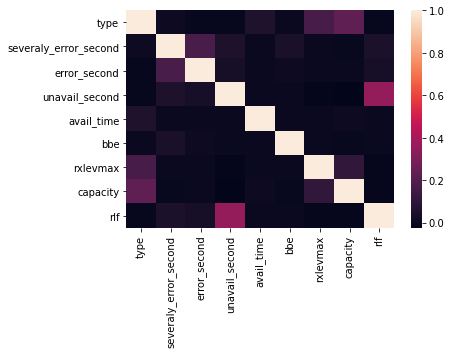

In [ ]:
import seaborn as sns
sns.heatmap(corr)

In [ ]:
data.columns

Index(['type', 'severaly_error_second', 'error_second', 'unavail_second',
       'avail_time', 'bbe', 'rxlevmax', 'capacity', 'rlf'],
      dtype='object')

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                print(columns)
selected_columns = data.columns[columns]
data = data[selected_columns]

In [ ]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [ ]:
y

array([False, False, False, ..., False, False, False])

#### **There was no such pair having high correlation value, hence this method is not suitable for indication of any redundant columns**

## **Backward Elimination**

https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

In [ ]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [ ]:
data=rl_kpis[['severaly_error_second','error_second','unavail_second','avail_time','bbe','rxlevmax','capacity','rlf']]

In [ ]:
data.dtypes

severaly_error_second    float64
error_second             float64
unavail_second           float64
avail_time               float64
bbe                      float64
rxlevmax                 float64
capacity                 float64
rlf                         bool
dtype: object

In [ ]:
# Checking for infinity and null values
ds=data.isin([np.inf, -np.inf])
np.isinf(data.iloc[:,:-1]).values.sum()
#X.isnull().sum()
data.iloc[:,:-1].isnull().sum() 

severaly_error_second      0
error_second               0
unavail_second             0
avail_time                 0
bbe                        0
rxlevmax                   0
capacity                 165
dtype: int64

In [ ]:
data

,severaly_error_second,error_second,unavail_second,avail_time,bbe,rxlevmax,capacity,rlf
0,0.0,0.0,0.0,86.4,0.0,-31.0,456.0,False
1,0.0,0.0,0.0,86.4,0.0,-30.7,456.0,False
2,0.0,0.0,0.0,86.4,0.0,-34.4,406.0,False
3,0.0,0.0,0.0,86.4,0.0,-35.3,247.0,False
4,0.0,0.0,0.0,86.4,0.0,-35.3,247.0,False
...,...,...,...,...,...,...,...,...
1992981,0.0,0.0,0.0,86.4,0.0,-36.8,495.0,False
1992982,0.0,0.0,0.0,86.4,0.0,-36.8,495.0,False
1992983,0.0,0.0,0.0,86.4,0.0,-28.9,495.0,False
1992984,0.0,0.0,0.0,86.4,0.0,-28.9,495.0,False


In [ ]:
# Checking for nan values
is_NaN = data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = data[row_has_NaN]

In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

severaly_error_second    0
error_second             0
unavail_second           0
avail_time               0
bbe                      0
rxlevmax                 0
capacity                 0
rlf                      0
dtype: int64

In [ ]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [ ]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
p_values=model.pvalues

In [ ]:
X_1[100]

array([  1. ,   0. ,   0. ,   0. ,  86.4,   0. , -32.7, 407. ])

In [ ]:
p_values

array([2.22172581e-007, 0.00000000e+000, 6.10771950e-183, 0.00000000e+000,
       7.65626684e-002, 7.10625958e-002, 1.62893325e-012, 4.74420719e-001])

In [ ]:
for i in range(0,len(p_values)):
  if p_values[i] > 0.05:
    print(i)

4
5
7


**Columns having high P value are considered to be redundant and can be dropped to improve performance.** <br>
**Avail time, bbe and capacity can be dropped**

## **RFE (Recursive Feature Elimination)**

In [ ]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


**This method is not suitable for droppping any column as the output of the model is True for all columns**

##**Embedded Method**

In [ ]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = data.iloc[:,:-1].columns)

Best alpha using built-in LassoCV: 0.001828
Best score using built-in LassoCV: 0.127664


In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 2 variables


In [ ]:
coef.sort_values()

capacity                -9.559263e-08
avail_time               0.000000e+00
rxlevmax                -0.000000e+00
bbe                      2.711982e-09
error_second             2.870396e-05
severaly_error_second    5.471792e-05
unavail_second           3.697294e-04
dtype: float64

Text(0.5, 1.0, 'Feature importance using Lasso Model')

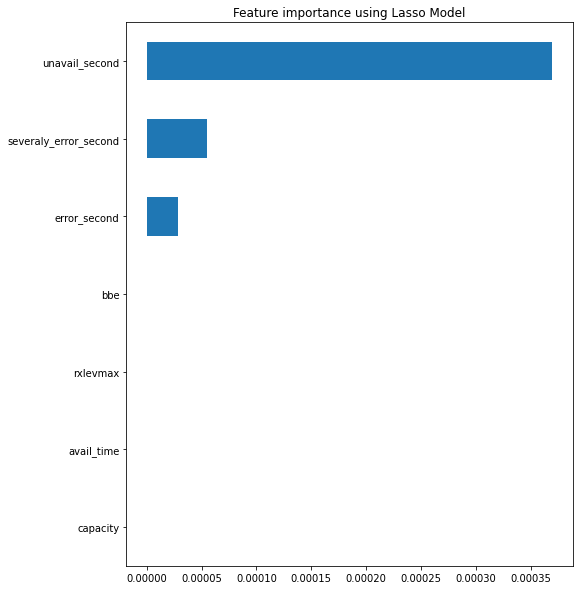

In [ ]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


**capacity, avail_time and rxlevmax can be dropped. Even bbe value is low.**



#### **bbe, avail_time and capacity are the overlapping redundant features obtained by Backward Elimination method and Embedded method. Hence, these factors will be dropped during training.**